Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.10/tkinter/__init__.py", line 1921, in __call__
    return self.func(*args)
  File "/tmp/ipykernel_415287/3192917071.py", line 49, in on_shear_slider_change
    shear_value.set(f"{float(value):.2f}")
NameError: name 'shear_value' is not defined. Did you mean: 'shear_label'?
Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.10/tkinter/__init__.py", line 1921, in __call__
    return self.func(*args)
  File "/tmp/ipykernel_415287/3192917071.py", line 54, in on_rotation_slider_change
    rotation_value.set(f"{float(value):.2f}")
NameError: name 'rotation_value' is not defined. Did you mean: 'rotation_label'?


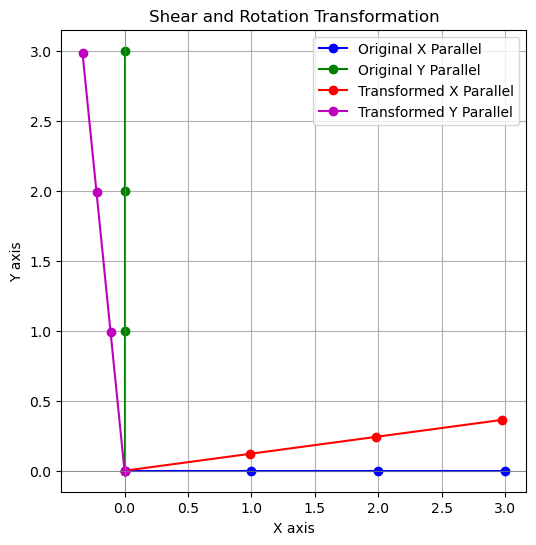

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from tkinter import ttk


def calculate_homography(shear_factor, rotation_angle):
    shear_matrix = np.array([[1, shear_factor], [0, 1]])
    theta = np.radians(rotation_angle)
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    homography_matrix = rotation_matrix.dot(shear_matrix)
    return homography_matrix


def update_plot(shear_factor, rotation_angle):
    shear_factor = float(shear_factor)
    rotation_angle = float(rotation_angle)

    homography_matrix = calculate_homography(shear_factor, rotation_angle)
    inv_homography_matrix = np.linalg.inv(homography_matrix)

    original_coords_x = np.vstack((x, y_x))
    original_coords_y = np.vstack((x_y, y))

    sheared_coords_x = homography_matrix.dot(original_coords_x)
    sheared_coords_y = homography_matrix.dot(original_coords_y)

    ax.clear()
    ax.plot(x, y_x, 'bo-', label='Original X Parallel')
    ax.plot(x_y, y, 'go-', label='Original Y Parallel')
    ax.plot(sheared_coords_x[0, :], sheared_coords_x[1, :], 'ro-', label='Transformed X Parallel')
    ax.plot(sheared_coords_y[0, :], sheared_coords_y[1, :], 'mo-', label='Transformed Y Parallel')
    ax.axhline(0, color='gray', lw=0.5)
    ax.axvline(0, color='gray', lw=0.5)
    ax.legend()
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_title('Shear and Rotation Transformation')
    ax.grid(True)

    canvas.draw()

    homography_text.set(
        f"Homography Matrix:\n{homography_matrix}\n\nInverse Homography Matrix:\n{inv_homography_matrix}")


def on_shear_slider_change(value):
    shear_value.set(f"{float(value):.2f}")
    update_plot(value, rotation_slider.get())


def on_rotation_slider_change(value):
    rotation_value.set(f"{float(value):.2f}")
    update_plot(shear_slider.get(), value)


def on_shear_entry_change(*args):
    try:
        value = float(shear_value.get())
        shear_slider.set(value)
        update_plot(value, rotation_slider.get())
    except ValueError:
        pass


def on_rotation_entry_change(*args):
    try:
        value = float(rotation_value.get())
        rotation_slider.set(value)
        update_plot(shear_slider.get(), value)
    except ValueError:
        pass


# 예제 데이터
x = np.array([0, 1, 2, 3])
y_x = np.array([0, 0, 0, 0])
x_y = np.array([0, 0, 0, 0])
y = np.array([0, 1, 2, 3])

# Tkinter GUI 설정
root = tk.Tk()
root.title("Shear and Rotation Transformation")

mainframe = ttk.Frame(root, padding="10 10 20 20")
mainframe.grid(column=0, row=0, sticky=(tk.N, tk.W, tk.E, tk.S))
root.columnconfigure(0, weight=1)
root.rowconfigure(0, weight=1)

# Shear factor slider
shear_label = ttk.Label(mainframe, text="Shear Factor")
shear_label.grid(column=1, row=1, sticky=tk.W)
shear_slider = ttk.Scale(mainframe, from_=-2.0, to=2.0, orient=tk.HORIZONTAL, command=on_shear_slider_change)
shear_slider.set(0.5)
shear_slider.grid(column=2, row=1, sticky=(tk.W, tk.E))

shear_value = tk.StringVar(value=f"{shear_slider.get():.2f}")
shear_entry = ttk.Entry(mainframe, textvariable=shear_value, width=5)
shear_entry.grid(column=3, row=1, sticky=tk.W)
shear_value.trace('w', on_shear_entry_change)

# Rotation angle slider
rotation_label = ttk.Label(mainframe, text="Rotation Angle")
rotation_label.grid(column=1, row=2, sticky=tk.W)
rotation_slider = ttk.Scale(mainframe, from_=-180, to=180, orient=tk.HORIZONTAL, command=on_rotation_slider_change)
rotation_slider.set(30)
rotation_slider.grid(column=2, row=2, sticky=(tk.W, tk.E))

rotation_value = tk.StringVar(value=f"{rotation_slider.get():.2f}")
rotation_entry = ttk.Entry(mainframe, textvariable=rotation_value, width=5)
rotation_entry.grid(column=3, row=2, sticky=tk.W)
rotation_value.trace('w', on_rotation_entry_change)

# Matplotlib Figure
fig, ax = plt.subplots(figsize=(6, 6))
canvas = FigureCanvasTkAgg(fig, master=mainframe)
canvas.get_tk_widget().grid(column=1, row=3, columnspan=3)

# Homography matrix display
homography_text = tk.StringVar()
homography_label = ttk.Label(mainframe, textvariable=homography_text, justify=tk.LEFT)
homography_label.grid(column=1, row=4, columnspan=3, sticky=tk.W)
homography_text.set("Homography Matrix:\n")

# 초기 플롯 업데이트
update_plot(0.5, 30)

# Padding for all elements
for child in mainframe.winfo_children():
    child.grid_configure(padx=5, pady=5)

root.mainloop()

In [45]:
cali_matrix = np.array([[0.99396996, 0.11020809,],
                        [-0.12117639, 0.99263099,]])

robot_matrix = np.array([[0.99396996, -0.11020809,],
                        [0.12117639, 0.99263099,]])

err = np.dot(robot_matrix,np.dot(cali_matrix, np.array([1, 0.0 ])))


(np.dot(cali_matrix, np.array([4, 0 ])) * np.array([0.022,0.024]) + np.array([0.256, 0.0]))


array([ 0.34346936, -0.01163293])

In [47]:
list = [[np.array([1,1,1]), np.array([2,2,2]), np.array([3,3,3])],
        [np.array([4,4,4]), np.array([5,5,5]), np.array([6,6,6])]]

list[0][0]

array([1, 1, 1])

In [49]:
for i in range(8,-1,-1):
    print(i)

8
7
6
5
4
3
2
1
0


In [59]:
def make_xyz(board_size = 9, board_h = 0.022, board_w = 0.0236, chun_won = np.array([0.236,0.0,0.0]),
                err_chun_won = np.array([-0.01, 0.01,0.0])): #시작과 동시에 각 점에 해당하는 xyz 좌표를 쫙 뽑아글로벌로 저장해둠
    '''
    <read me>

    o계산에 필요한 것 
    -> base 좌표계로 부터의 천원까지의 거리(chun_won)
    -> 한 칸의 높이 (x축으로 길이) = board_h
    -> 한 칸의 폭 (y축으로 길이) = board_w
    
    o캘리브레이션에 필요한 것
    -> 천원 중심의 십자가를 그린 후 각 축의 흐트러진 정도
    -> 천원에 둘 때 실제 착점까지의 오차 [x,y]

    o그 외의 것
    -> 제어 자체를 수정(놓는데 땅에 끌리거나 닿거나)이 필요한 것들은 모션 부분에서 수정함
    '''
    A1 = [chun_won + board_w*4 - err_chun_won[0], 0 - board_h*4 - err_chun_won[1], 0.25 + 0.0125]

    xyz = []#3차원 리스트가 될거임

    for i in range(-4,5):
        tmp = []
        for j in range(-4,5):
            cali_matrix = np.array([[0.99396996, 0.11020809, 0.0],
                                    [-0.12117639, 0.99263099, 0.0],
                                    [0.0        , 0.0       , 1.0]])
            tmp.append(np.dot(cali_matrix, np.array([j, i ,1])) * np.array([board_h,board_w,0.2625]) + np.array(chun_won - err_chun_won))
                        

        xyz.append(tmp)

    return xyz

In [60]:
xyz = make_xyz()
xyz

[[array([ 0.14883233, -0.09226531,  0.2625    ]),
  array([ 0.17069967, -0.09512508,  0.2625    ]),
  array([ 0.19256701, -0.09798484,  0.2625    ]),
  array([ 0.21443435, -0.1008446 ,  0.2625    ]),
  array([ 0.23630169, -0.10370437,  0.2625    ]),
  array([ 0.25816903, -0.10656413,  0.2625    ]),
  array([ 0.28003637, -0.10942389,  0.2625    ]),
  array([ 0.30190371, -0.11228365,  0.2625    ]),
  array([ 0.32377104, -0.11514342,  0.2625    ])],
 [array([ 0.15125691, -0.06883922,  0.2625    ]),
  array([ 0.17312425, -0.07169899,  0.2625    ]),
  array([ 0.19499159, -0.07455875,  0.2625    ]),
  array([ 0.21685893, -0.07741851,  0.2625    ]),
  array([ 0.23872627, -0.08027827,  0.2625    ]),
  array([ 0.26059361, -0.08313804,  0.2625    ]),
  array([ 0.28246094, -0.0859978 ,  0.2625    ]),
  array([ 0.30432828, -0.08885756,  0.2625    ]),
  array([ 0.32619562, -0.09171733,  0.2625    ])],
 [array([ 0.15368149, -0.04541313,  0.2625    ]),
  array([ 0.17554883, -0.04827289,  0.2625    ])

In [5]:
import numpy as np
list = [[np.array([1,2,3,4,5,5,6])],
        [np.array([1,2,3,4,5,5,6])],
        [np.array([1,2,3,4,5,5,6])],
        [np.array([1,2,3,4,5,5,6])]]

list[:][0]



[array([1, 2, 3, 4, 5, 5, 6])]